In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r'C:\Users\ply58\OneDrive\Tài liệu\PythonML\Github Repositories\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df = df.dropna()

In [5]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
rfc = RandomForestClassifier(n_estimators=10, max_features='log2', random_state=101)
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test) 

In [14]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [15]:
print(confusion_matrix(y_test, preds))

[[40  1  0]
 [ 1 22  0]
 [ 0  0 37]]


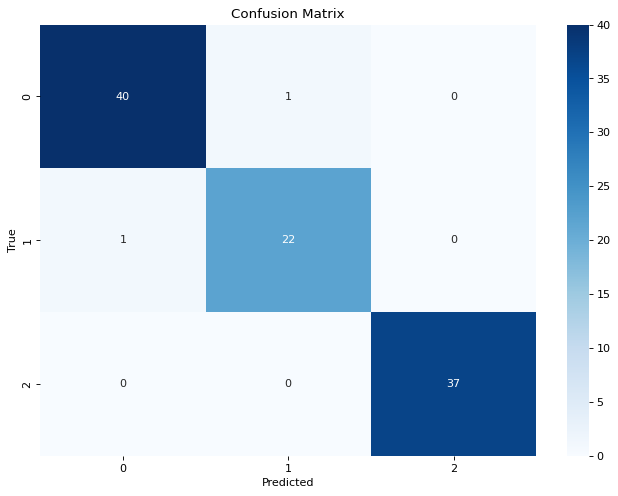

In [19]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(10,7), dpi=80)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(confusion_matrix(y_test, preds))

In [20]:
rfc.feature_importances_

array([3.44340358e-01, 7.41861334e-02, 4.34799672e-01, 4.35631692e-02,
       8.05937184e-02, 1.51225757e-02, 2.88354917e-04, 7.10601858e-03])